In [2]:
import numpy as np
import random 
from collections import defaultdict
import matplotlib.pyplot as plt

In [20]:
class Bandit:
    
    def __init__(self, k):
#         number of arms
        self.k = k
        self.mean_sd_list = []
        
        max_mean = 0
        self.max_i = 0
        
        for i in range(k):
            mean = random.uniform(0, 10)
            sigma = random.uniform(0, 2)
            self.mean_sd_list.append((mean, sigma))
            
            if mean > max_mean:
                max_mean = mean
                self.max_i = i
        
    def generate_reward(self, i):
        mu, sigma = self.mean_sd_list[i]
        return np.random.normal(mu, sigma)
    
    def generate_optimum_reward(self):
        return self.generate_reward(self.max_i)

In [141]:
class Solver(object):
    def __init__(self, bandit):
        """
        bandit(object of class Bandit) to solve
        """
        self.bandit = bandit
#         self.reinit()
        
        self.counts = [0] * self.bandit.k
        self.actions = []
        self.cumulative_regret = 0
        self.cumulative_regret_list = []
        self.cumulative_reward = 0
        self.avg_reward_list = []
    
    def update_regret(self, r):
        self.cumulative_regret += self.bandit.generate_optimum_reward() - r
        self.cumulative_regret_list.append(self.cumulative_regret)
    
    def update_reward(self, r):
        self.cumulative_reward += r
        self.t = np.sum(self.counts)
        self.avg_reward_list.append(self.cumulative_reward / self.t)
        
        
    def run_one_step(self):
        pass
    
    def run(self, num_steps):
        
        for _ in range(num_steps):
            i, r = self.run_one_step()
            
            self.counts[i] += 1 
            
            self.update_regret(r)
            self.update_reward(r)
            self.actions.append(i)
            
    def reinit(self):
        self.counts = [0] * self.bandit.k
        self.actions = []
        self.cumulative_regret = 0
        self.cumulative_regret_list = []
        self.cumulative_reward = 0
        self.avg_reward_list = []
        
    def avg_run(self, num_steps, num_avg):
        avg_list = [0] * num_steps
        for _ in range(num_avg):
            self.reinit()
            self.run(num_steps)
            for i in range(num_steps):
                avg_list[i] += self.avg_reward_list[i]
        
        avg_list = [x/num_avg for x in avg_list]
        return avg_list

In [144]:
class EpsilonGreedy(Solver):
    
    def __init__(self, bandit, epsilon, time_variant_epsilon, init_trials):
        super().__init__(bandit)
        self.bandit = bandit
        self.epsilon = epsilon
        self.time_variant_epsilon = time_variant_epsilon
        self.mean_estimate = [0] * self.bandit.k
        
        self.set_inital_estimate(init_trials)
#         print("Initial estimate = ", self.mean_estimate)
    
    def set_inital_estimate(self, trials):
        for _ in range(trials):
            for i in range(self.bandit.k):
                r = self.bandit.generate_reward(i)
                self.mean_estimate[i] = self.mean_estimate[i] + (r - self.mean_estimate[i])/(self.counts[i] + 1)

    def run_one_step(self):
#         Exploration
        if np.random.random() < self.epsilon:
            i = np.random.randint(0, self.bandit.k)
#         Exploitation
        else:
#         Pick the one with max probabilities
            i = max(range(self.bandit.k), key = lambda x: self.mean_estimate[x])
        
        r = self.bandit.generate_reward(i)
        self.mean_estimate[i] = self.mean_estimate[i] + (r - self.mean_estimate[i])/(self.counts[i] + 1)
        
        return i, r

In [22]:
def main(k, n):
    bandit = Bandit(k)
    
    print("Guassian distribution of bandits = \n", bandit.mean_sd_list)
    
    epsilon_greedy_solver = EpsilonGreedy(bandit, epsilon = 0.2, time_variant_epsilon = False)
    epsilon_greedy_solver.run(n)
    
    plt.plot(epsilon_greedy_solver.avg_reward_list)

Guassian distribution of bandits = 
 [(1.4488655573844644, 1.8590454841020445), (9.811833608303639, 0.03215090558664224)]


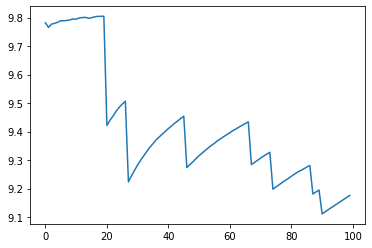

In [23]:
main(2, 100)

In [118]:
k = 10
n = 1000
bandit = Bandit(k)

print("Guassian distribution of bandits = \n", bandit.mean_sd_list)

Guassian distribution of bandits = 
 [(2.9315443244475823, 1.416051210339747), (6.150437626874991, 0.017100284892801243), (4.046220145411023, 0.11828849596259539), (8.456768535102853, 1.0758990561621846), (5.689760970778439, 0.15952512269620112), (9.924651790413652, 1.1150221888037914), (5.546793972875089, 0.42268406478838694), (6.417229180427819, 0.5100811911521621), (9.135185381622723, 0.3662471848425233), (3.5835994265756077, 0.17910091554476826)]


In [119]:
colors = ['b', 'r', 'y', 'c', 'k']
labels = ['Epsilon = 0.1', 'Epsilon = 0.01', 'Epsilon = 0.00']

In [123]:
solvers = [EpsilonGreedy(bandit, epsilon = 0.1, init_trials = 1, time_variant_epsilon = False), 
          EpsilonGreedy(bandit, epsilon = 0.01, init_trials = 1, time_variant_epsilon = False), 
          EpsilonGreedy(bandit, epsilon = 0.00, init_trials = 1, time_variant_epsilon = False)]

for s in solvers:
    s.run(n)

Initial estimate =  [3.382723418778569, 6.14815547497567, 3.953622519583832, 8.113925107456348, 5.426646211039416, 8.368623316528215, 5.783401816501615, 5.52881297903539, 9.220976060906008, 3.5954919348702132]
Initial estimate =  [4.534056292593811, 6.199089522217706, 4.1058190407215145, 10.189066862061447, 5.7535223215934135, 10.417583747541205, 5.072300193723025, 5.6257280526678555, 9.220742021224282, 3.454692057251567]
Initial estimate =  [3.6986594249804066, 6.154712659354619, 4.12915034331547, 8.781215818423119, 5.548018531773727, 11.69279127057488, 5.427682766766674, 7.059861524361171, 9.051055419523664, 3.37694851460617]


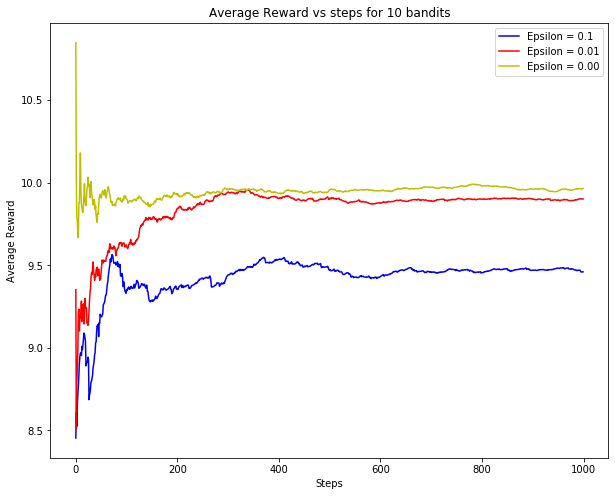

In [124]:
plt.figure(figsize = (10, 8))
i = 0
for s in solvers:
    plt.plot(s.avg_reward_list, color = color[i], label = labels[i])
    i += 1
    
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward vs steps for {} bandits".format(k))
plt.show()

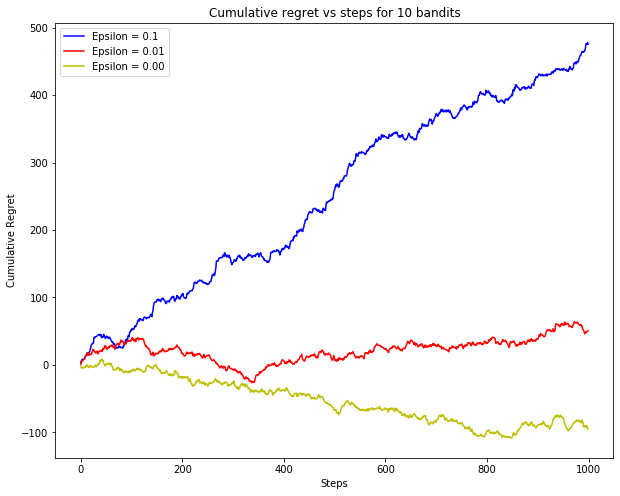

In [126]:
plt.figure(figsize = (10, 8))
i = 0
for s in solvers:
    plt.plot(s.cumulative_regret_list, color = color[i], label = labels[i])
    i += 1
    
plt.xlabel("Steps")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.title("Cumulative regret vs steps for {} bandits".format(k))
plt.show()

### Taking average over 2000 steps

Guassian distribution of bandits = 
 [(2.611436570481459, 0.3218365823960678), (0.7207133102562624, 1.9567892040087644)]


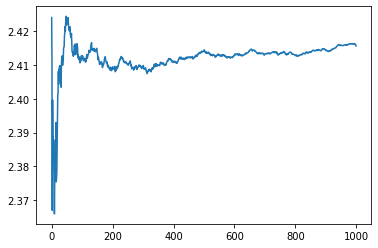

In [146]:
bandit = Bandit(k)

print("Guassian distribution of bandits = \n", bandit.mean_sd_list)

epsilon_greedy_solver = EpsilonGreedy(bandit, epsilon = 0.2, init_trials = 1, time_variant_epsilon = False)
l = epsilon_greedy_solver.avg_run(n, 100)

# plt.plot(epsilon_greedy_solver.avg_reward_list)
plt.plot(l)

In [151]:
k = 5
n = 1000
avg_over = 100
bandit = Bandit(k)

print("Guassian distribution of bandits = \n", bandit.mean_sd_list)

colors = ['b', 'r', 'y', 'c', 'k']
labels = ['Epsilon = 0.1', 'Epsilon = 0.01', 'Epsilon = 0.00']

solvers = [EpsilonGreedy(bandit, epsilon = 0.1, init_trials = 1, time_variant_epsilon = False), 
          EpsilonGreedy(bandit, epsilon = 0.01, init_trials = 1, time_variant_epsilon = False), 
          EpsilonGreedy(bandit, epsilon = 0.00, init_trials = 1, time_variant_epsilon = False)]

Guassian distribution of bandits = 
 [(9.623488862961308, 1.6157566463880648), (5.492212584828869, 0.03170381860384297), (3.441648648532679, 1.3349049814917167), (5.349041724851336, 1.618585227638965), (3.799522341640955, 0.13659608986312755)]


In [152]:
avg_list = []
for s in solvers:
    l = s.avg_run(n, avg_over)
    avg_list.append(l)

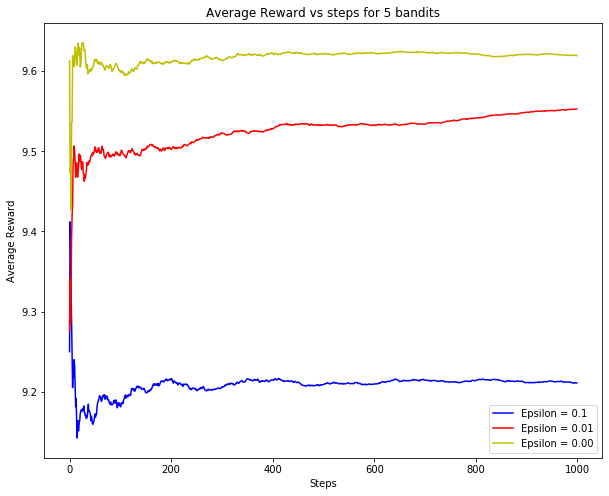

In [153]:
plt.figure(figsize = (10, 8))
for i, l in enumerate(avg_list):
    plt.plot(l, color = color[i], label = labels[i])
    
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Average Reward vs steps for {} bandits".format(k))
plt.show()

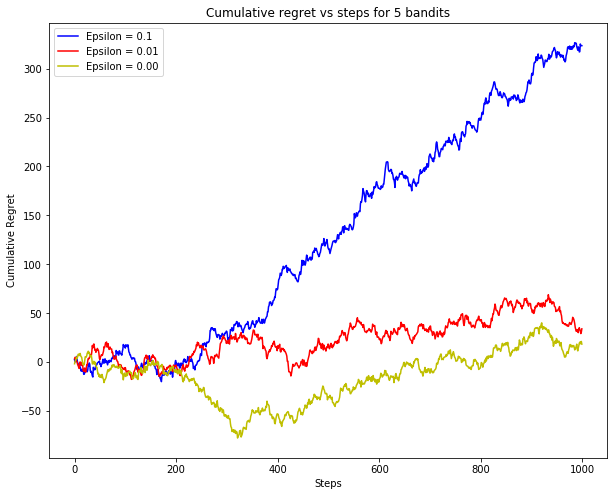

In [154]:
plt.figure(figsize = (10, 8))
i = 0
for s in solvers:
    plt.plot(s.cumulative_regret_list, color = color[i], label = labels[i])
    i += 1
    
plt.xlabel("Steps")
plt.ylabel("Cumulative Regret")
plt.legend()
plt.title("Cumulative regret vs steps for {} bandits".format(k))
plt.show()